In [0]:
import os
import tensorflow as tf
import tensorflow.keras as keras

In [2]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import numpy as np
dataset=np.load("/content/drive/My Drive/train and test.npz")

In [0]:
dataset["arr_0"].shape
X_train=dataset["arr_0"]
y_train=dataset["arr_2"]

In [5]:
y_test.shape

(13800,)

In [0]:
y_train=keras.utils.to_categorical(y_train)

In [7]:
y_train.shape

(78200, 46)

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_trn,X_val,y_trn,y_val=train_test_split(X_train,y_train,test_size=0.25,random_state=1024)

In [10]:
X_trn.shape

(58650, 32, 32)

In [11]:
X_trn=X_trn.reshape(58650,32,32,1)
X_val.shape

(19550, 32, 32)

In [0]:
X_val=X_val.reshape(19550,32,32,1)

In [0]:
X_trn=X_trn/255.0
X_val=X_val/255.0

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,BatchNormalization,Dropout,InputLayer,AveragePooling2D

In [0]:
model=Sequential()

model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same',input_shape=(32,32,1)))
model.add(BatchNormalization())
model.add(Conv2D(32,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

model.add(Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=3,activation='relu',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=2,strides=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dense(256,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(46,activation='softmax'))

In [0]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

In [38]:
stats=model.fit(X_trn,y_trn,validation_data=(X_val,y_val),epochs=20,batch_size=64)

Train on 58650 samples, validate on 19550 samples
Epoch 1/20
58650/58650 [==============================] - 58s 993us/sample - loss: 0.6912 - acc: 0.8031 - val_loss: 0.1518 - val_acc: 0.9532
Epoch 2/20
58650/58650 [==============================] - 45s 768us/sample - loss: 0.1569 - acc: 0.9521 - val_loss: 0.0877 - val_acc: 0.9735
Epoch 3/20
58650/58650 [==============================] - 45s 766us/sample - loss: 0.1095 - acc: 0.9656 - val_loss: 0.0959 - val_acc: 0.9723
Epoch 4/20
58650/58650 [==============================] - 45s 769us/sample - loss: 0.0881 - acc: 0.9724 - val_loss: 0.0634 - val_acc: 0.9820
Epoch 5/20
58650/58650 [==============================] - 45s 772us/sample - loss: 0.0752 - acc: 0.9764 - val_loss: 0.0722 - val_acc: 0.9795
Epoch 6/20
58650/58650 [==============================] - 45s 770us/sample - loss: 0.0660 - acc: 0.9799 - val_loss: 0.0551 - val_acc: 0.9835
Epoch 7/20
58650/58650 [==============================] - 45s 773us/sample - loss: 0.0579 - acc: 0.9825 

In [0]:
import matplotlib.pyplot as plt
from keras.utils import plot_model

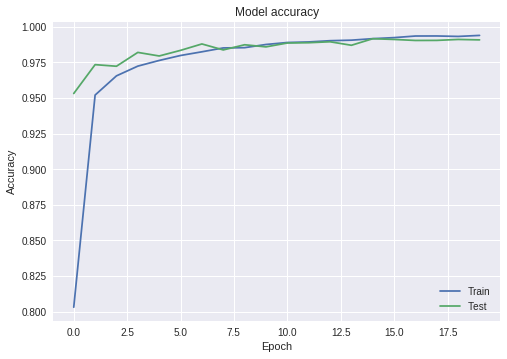

In [40]:
plt.plot(stats.history["acc"])
plt.plot(stats.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

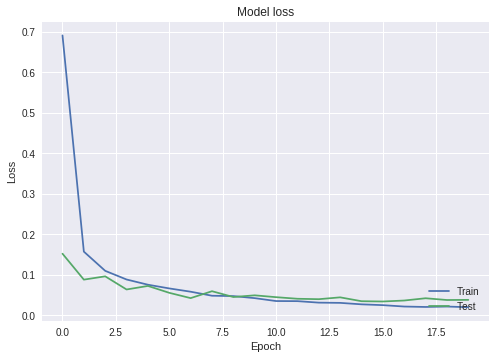

In [41]:
plt.plot(stats.history['loss'])
plt.plot(stats.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')

In [42]:
X_test=dataset["arr_1"]
X_test.shape

(13800, 32, 32, 1)

In [0]:
X_test=X_test.reshape(13800,32,32,1)

In [44]:
y_test=dataset["arr_3"]
y_test.shape

(13800,)

In [0]:
y_test=keras.utils.to_categorical(y_test)

In [46]:
y_test.shape

(13800, 46)

In [47]:
model.evaluate(X_test/255.0,y_test)

13800/13800 [==============================] - 4s 281us/sample - loss: 0.0296 - acc: 0.9922


[0.029603550454595985, 0.9922464]